# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score

# DATA LOADING AND PRE-PROCESSING

In [2]:
data=pd.read_csv("data.csv")

In [3]:
data.shape

(11914, 16)

In [4]:
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [5]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [6]:
data=data.drop('Market Category',axis=1)

In [7]:
data=data.dropna()

In [8]:
data.shape

(11812, 15)

In [9]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,1.181200e+04
mean,2010.361581,249.504487,5.649424,3.432526,26.320945,19.328141,1553.679902,4.055994e+04
std,7.594647,109.206947,1.751646,0.882919,7.443589,6.527734,1440.067820,6.028413e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.099000e+04
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.997000e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.220500e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [10]:
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [11]:
data.nunique()

Make                   47
Model                 904
Year                   28
Engine Fuel Type        9
Engine HP             355
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Vehicle Size            3
Vehicle Style          16
highway MPG            44
city mpg               50
Popularity             47
MSRP                 6013
dtype: int64

In [12]:
data=data.drop('Model',axis=1)

In [13]:
cat_columns=['Make','Engine Fuel Type','Transmission Type','Driven_Wheels','Vehicle Size','Vehicle Style']
num_columns=['Engine HP','Engine Cylinders','Number of Doors','highway MPG','city mpg','Popularity']

In [14]:
cat_data=data[cat_columns]
num_data=data[num_columns]

# TREATING OUTLIERS

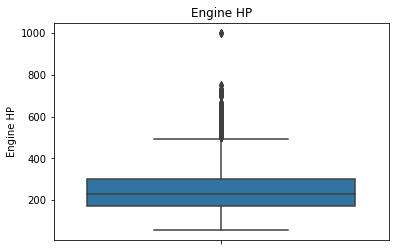

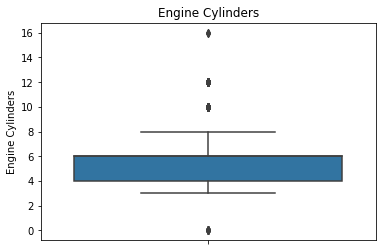

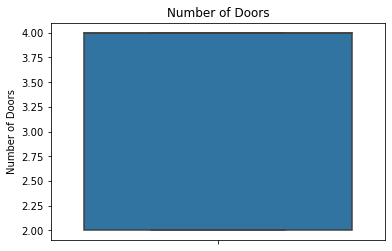

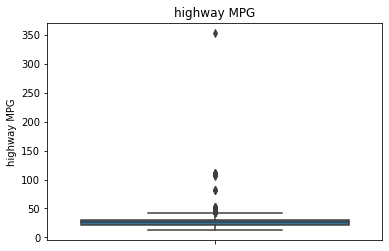

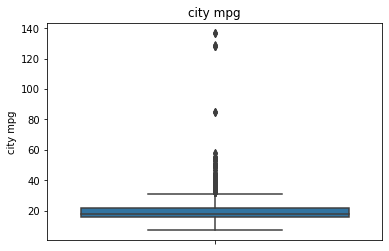

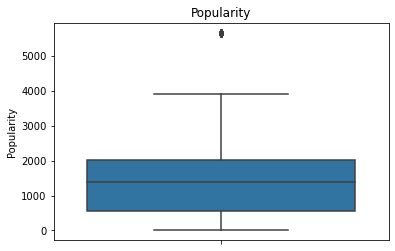

In [15]:
for col in num_columns:
    sns.boxplot(y=col, data=data)
    plt.title(col)
    plt.show()

In [16]:
for col in num_data:

    q1=np.percentile(num_data[col],25) 
    q3=np.percentile(num_data[col],75)

    IQR=q3-q1
    
    print('Outliers for :',col,'\n')
  
    upper=q3+1.5*IQR

    lower=q1-1.5*IQR
   
    outliers=[]
    
    for i in num_data[col]:
        if(i<lower or i>upper):
            outliers.append(i)
    print("Outliers are:",outliers)
    print("\n")

Outliers for : Engine HP 

Outliers are: [562.0, 562.0, 562.0, 597.0, 562.0, 562.0, 562.0, 597.0, 562.0, 515.0, 515.0, 515.0, 515.0, 515.0, 515.0, 543.0, 631.0, 604.0, 543.0, 620.0, 543.0, 620.0, 611.0, 611.0, 611.0, 611.0, 661.0, 532.0, 532.0, 532.0, 604.0, 543.0, 631.0, 543.0, 620.0, 620.0, 543.0, 641.0, 641.0, 535.0, 520.0, 520.0, 560.0, 560.0, 520.0, 560.0, 520.0, 560.0, 500.0, 540.0, 580.0, 540.0, 580.0, 500.0, 540.0, 600.0, 600.0, 540.0, 540.0, 540.0, 540.0, 540.0, 540.0, 540.0, 540.0, 600.0, 503.0, 503.0, 500.0, 500.0, 500.0, 500.0, 700.0, 700.0, 720.0, 720.0, 700.0, 700.0, 720.0, 720.0, 700.0, 750.0, 750.0, 700.0, 500.0, 530.0, 530.0, 503.0, 503.0, 503.0, 503.0, 553.0, 580.0, 505.0, 580.0, 650.0, 650.0, 605.0, 605.0, 520.0, 520.0, 570.0, 520.0, 570.0, 707.0, 707.0, 707.0, 707.0, 707.0, 707.0, 621.0, 510.0, 536.0, 621.0, 536.0, 510.0, 621.0, 510.0, 536.0, 500.0, 577.0, 577.0, 577.0, 600.0, 600.0, 600.0, 552.0, 552.0, 552.0, 626.0, 600.0, 616.0, 572.0, 500.0, 521.0, 567.0, 626.0,

In [17]:
for col in num_data:
    tenth_percentile=np.percentile(num_data[col],10)
    ninetieth_percentile=np.percentile(num_data[col],90)
    print(tenth_percentile,ninetieth_percentile)
    num_data[col]=np.where(num_data[col]<tenth_percentile,tenth_percentile,num_data[col]) 
    num_data[col]=np.where(num_data[col]>ninetieth_percentile,ninetieth_percentile,num_data[col])

138.0 385.0
4.0 8.0
2.0 4.0
18.0 35.0
13.0 26.0
204.0 3916.0


In [18]:
num_data.describe()

,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity
count,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000
mean,241.348798,5.565273,3.432526,26.003640,18.846935,1432.337369
std,80.796290,1.496777,0.882919,5.366264,4.115010,1101.429182
min,138.000000,4.000000,2.000000,18.000000,13.000000,204.000000
25%,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000
50%,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000
75%,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000
max,385.000000,8.000000,4.000000,35.000000,26.000000,3916.000000


# ENCODING

In [19]:
cat_data

,Make,Engine Fuel Type,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style
0,BMW,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe
1,BMW,premium unleaded (required),MANUAL,rear wheel drive,Compact,Convertible
2,BMW,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe
3,BMW,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe
4,BMW,premium unleaded (required),MANUAL,rear wheel drive,Compact,Convertible
...,...,...,...,...,...,...
11909,Acura,premium unleaded (required),AUTOMATIC,all wheel drive,Midsize,4dr Hatchback
11910,Acura,premium unleaded (required),AUTOMATIC,all wheel drive,Midsize,4dr Hatchback
11911,Acura,premium unleaded (required),AUTOMATIC,all wheel drive,Midsize,4dr Hatchback
11912,Acura,premium unleaded (recommended),AUTOMATIC,all wheel drive,Midsize,4dr Hatchback


In [20]:
cat_data.nunique()

Make                 47
Engine Fuel Type      9
Transmission Type     5
Driven_Wheels         4
Vehicle Size          3
Vehicle Style        16
dtype: int64

In [21]:
label = LabelEncoder()

In [22]:
cat_data['Engine Fuel Type'].value_counts()

regular unleaded                                7155
premium unleaded (required)                     1991
premium unleaded (recommended)                  1519
flex-fuel (unleaded/E85)                         899
diesel                                           153
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
electric                                          13
natural gas                                        2
Name: Engine Fuel Type, dtype: int64

In [23]:
cat_data.loc[cat_data['Engine Fuel Type'] == 'regular unleaded', 'Engine Fuel Type'] = 'regular'
cat_data.loc[cat_data['Engine Fuel Type'] == 'premium unleaded (required)', 'Engine Fuel Type'] = 'premium'
cat_data.loc[cat_data['Engine Fuel Type'] == 'premium unleaded (recommended)', 'Engine Fuel Type'] = 'premium'
cat_data.loc[cat_data['Engine Fuel Type'] == 'flex-fuel (unleaded/E85)', 'Engine Fuel Type'] = 'flex-fuel'
cat_data.loc[cat_data['Engine Fuel Type'] == 'flex-fuel (premium unleaded required/E85)', 'Engine Fuel Type'] = 'flex-fuel'
cat_data.loc[cat_data['Engine Fuel Type'] == 'flex-fuel (premium unleaded recommended/E85)', 'Engine Fuel Type'] = 'flex-fuel'
cat_data.loc[cat_data['Engine Fuel Type'] == 'flex-fuel (unleaded/natural gas)', 'Engine Fuel Type'] = 'flex-fuel'

In [24]:
cat_data= pd.get_dummies(cat_data, columns=['Engine Fuel Type'], drop_first=True)

In [25]:
cat_data['Make'].value_counts()

Chevrolet        1115
Ford              868
Volkswagen        805
Toyota            743
Dodge             626
Nissan            548
GMC               515
Honda             447
Mazda             403
Cadillac          397
Mercedes-Benz     352
Suzuki            348
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               226
Mitsubishi        210
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           156
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            68
Scion              60
FIAT               59
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Spyker              3
Genesis   

In [26]:
cat_data= pd.get_dummies(cat_data, columns=['Make'], drop_first=True)

In [27]:
cat_data['Transmission Type'].value_counts()

AUTOMATIC           8231
MANUAL              2922
AUTOMATED_MANUAL     625
UNKNOWN               19
DIRECT_DRIVE          15
Name: Transmission Type, dtype: int64

In [28]:
cat_data= pd.get_dummies(cat_data, columns=['Transmission Type'], drop_first=True)

In [29]:
cat_data['Driven_Wheels'].value_counts()

front wheel drive    4732
rear wheel drive     3341
all wheel drive      2336
four wheel drive     1403
Name: Driven_Wheels, dtype: int64

In [30]:
cat_data= pd.get_dummies(cat_data, columns=['Driven_Wheels'], drop_first=True)

In [31]:
cat_data['Vehicle Size'].value_counts()

Compact    4708
Midsize    4356
Large      2748
Name: Vehicle Size, dtype: int64

In [32]:
cat_data['Vehicle Size'] = label.fit_transform(cat_data['Vehicle Size'])

In [33]:
cat_data['Vehicle Style'].value_counts()

Sedan                  3013
4dr SUV                2480
Coupe                  1190
Convertible             793
Crew Cab Pickup         681
4dr Hatchback           678
Extended Cab Pickup     623
Wagon                   587
2dr Hatchback           503
Passenger Minivan       412
Regular Cab Pickup      392
2dr SUV                 138
Passenger Van           128
Cargo Van                95
Cargo Minivan            70
Convertible SUV          29
Name: Vehicle Style, dtype: int64

In [34]:
cat_data= pd.get_dummies(cat_data, columns=['Vehicle Style'], drop_first=True)

In [35]:
cat_data

,Vehicle Size,Engine Fuel Type_electric,Engine Fuel Type_flex-fuel,Engine Fuel Type_natural gas,Engine Fuel Type_premium,Engine Fuel Type_regular,Make_Alfa Romeo,Make_Aston Martin,Make_Audi,Make_BMW,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11910,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11911,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11912,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
data=pd.concat([data['Year'],num_data,cat_data,data['MSRP']],axis=1)

In [37]:
data


,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Vehicle Size,Engine Fuel Type_electric,Engine Fuel Type_flex-fuel,...,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon,MSRP
0,2011,335.0,6.0,2.0,26.0,19.0,3916.0,0,0,0,...,0,1,0,0,0,0,0,0,0,46135
1,2011,300.0,6.0,2.0,28.0,19.0,3916.0,0,0,0,...,0,0,0,0,0,0,0,0,0,40650
2,2011,300.0,6.0,2.0,28.0,20.0,3916.0,0,0,0,...,0,1,0,0,0,0,0,0,0,36350
3,2011,230.0,6.0,2.0,28.0,18.0,3916.0,0,0,0,...,0,1,0,0,0,0,0,0,0,29450
4,2011,230.0,6.0,2.0,28.0,18.0,3916.0,0,0,0,...,0,0,0,0,0,0,0,0,0,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,2012,300.0,6.0,4.0,23.0,16.0,204.0,2,0,0,...,0,0,0,0,0,0,0,0,0,46120
11910,2012,300.0,6.0,4.0,23.0,16.0,204.0,2,0,0,...,0,0,0,0,0,0,0,0,0,56670
11911,2012,300.0,6.0,4.0,23.0,16.0,204.0,2,0,0,...,0,0,0,0,0,0,0,0,0,50620
11912,2013,300.0,6.0,4.0,23.0,16.0,204.0,2,0,0,...,0,0,0,0,0,0,0,0,0,50920


In [38]:
num_columns=['Year','Engine HP','Engine Cylinders','Number of Doors','highway MPG','city mpg','Popularity','MSRP']
df=pd.DataFrame(data[num_columns])

In [39]:
corr_matrrix=df.corr()
print(corr_matrrix)

                      Year  Engine HP  Engine Cylinders  Number of Doors  \
Year              1.000000   0.380812         -0.046441         0.262439   
Engine HP         0.380812   1.000000          0.757409        -0.038598   
Engine Cylinders -0.046441   0.757409          1.000000        -0.096996   
Number of Doors   0.262439  -0.038598         -0.096996         1.000000   
highway MPG       0.314405  -0.497073         -0.744191         0.115321   
city mpg          0.273064  -0.586781         -0.805766         0.134252   
Popularity        0.103084   0.073997          0.073581        -0.056239   
MSRP              0.227327   0.503592          0.368277        -0.127316   

                  highway MPG  city mpg  Popularity      MSRP  
Year                 0.314405  0.273064    0.103084  0.227327  
Engine HP           -0.497073 -0.586781    0.073997  0.503592  
Engine Cylinders    -0.744191 -0.805766    0.073581  0.368277  
Number of Doors      0.115321  0.134252   -0.056239 -0.1273

<AxesSubplot:>

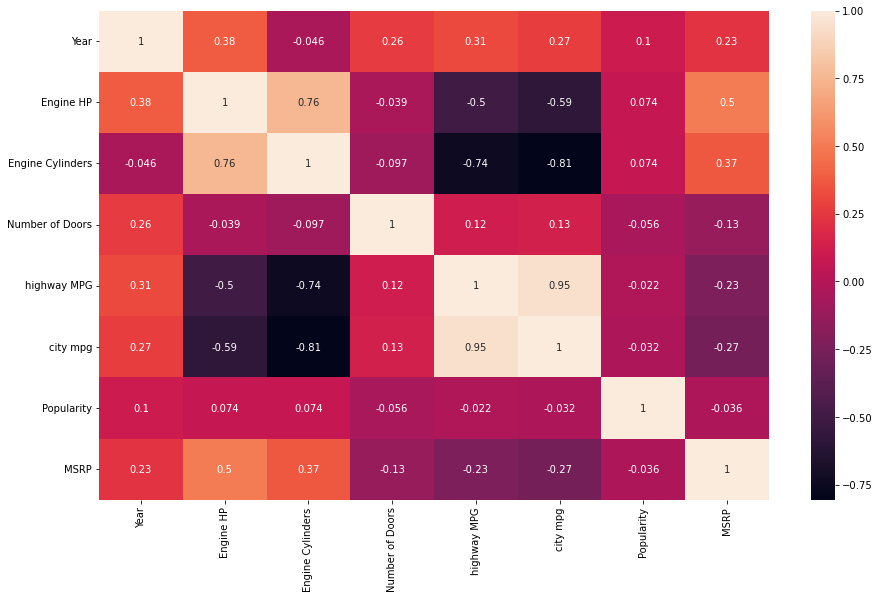

In [40]:
fig = plt.figure(figsize=(15,9))
sns.heatmap(corr_matrrix, xticklabels=corr_matrrix.columns, yticklabels=corr_matrrix.columns,annot=True)

# TRAIN-TEST SPLIT

In [41]:
x=data.drop('MSRP',axis=1)
y=data['MSRP']

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# MODEL BUILDING AND EVALUATION

In [43]:
dtr= DecisionTreeRegressor(max_depth=10,random_state=42)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [44]:
y_pred = dtr.predict(x_test)

In [45]:
mean_squared_error(y_test, y_pred)

621862771.027793

In [46]:
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)

R2 score: 0.7786555156092663


In [49]:
y_train_pred = dtr.predict(x_train)
r2_train = r2_score(y_train, y_train_pred)

print('Training R2 score:', r2_train)

Training R2 score: 0.9576355148574054


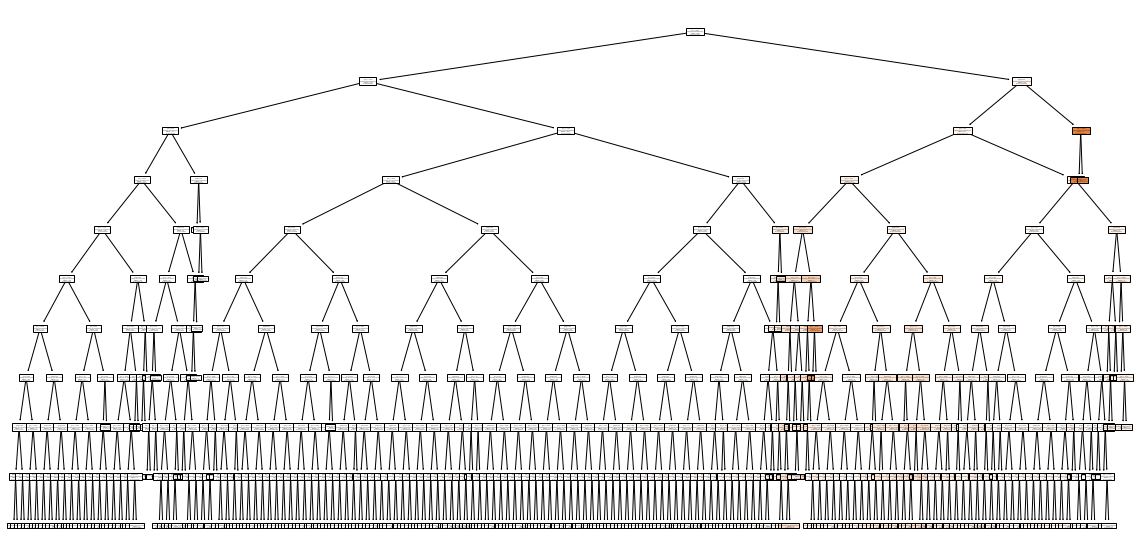

In [46]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(dtr, filled=True)
plt.show()

# POST PRUNING

In [47]:
path = dtr.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]
trees = []
for ccp_alpha in ccp_alphas:
    dtr = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    dtr.fit(x_train, y_train)
    trees.append(dtr)
mse_post_pruned = [mean_squared_error(y_test, dtr.predict(x_test)) for tree in trees]
idx_min_mse = np.argmin(mse_post_pruned)
tree_post_pruned = trees[idx_min_mse]

In [48]:
print("MSE for post-pruned tree: {}".format(mse_post_pruned[idx_min_mse]))


MSE for post-pruned tree: 1628810082.0913706


# HYPERPARAMETER TUNING

In [47]:
param_grid = {
    'max_depth': range(2,50,1),
    'min_samples_split': range(1,20,1),
    'min_samples_leaf': range(1,15,1),
    'ccp_alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
}

In [ ]:
grid_search = GridSearchCV(dtr, param_grid, cv=5)
grid_search.fit(x_train, y_train)

In [ ]:
print("Best Hyperparameters:", grid_search.best_params_)

In [ ]:
best_regressor = DecisionTreeRegressor(**grid_search.best_params_)
best_regressor.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_regressor.predict(X_test)
mse = np.mean((y_pred - y_test) ** 2)
print("Mean Squared Error:", mse)

In [ ]:
y_pred = best_regressor.predict(X_test)
mse = np.mean((y_pred - y_test) ** 2)
print("Mean Squared Error:", mse)

In [ ]:
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)